In [62]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    # adjustment for histograms
    if kwargs.get("is_histogram", False):
        plt.figure(figsize=figsize)
        plt.plot(image)
    else:
        width=image.shape[1] 
        height=image.shape[0]
        margin=50 
        # dots per inch
        dpi=100.
        # inches
        figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
        #axes ratio
        left = margin/dpi/figsize[0] 
        bottom = margin/dpi/figsize[1]
        fig = plt.figure(figsize=figsize, dpi=dpi)
        fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
        _ = plt.imshow(image, cmap=cmap)
        plt.axis("off")
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    plt.show()
    
def display_histogram(histograms, figsize=(6, 6), **kwargs):
    plt.figure(figsize=figsize)
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    for h, c in histograms:
        plt.plot(h, color=c)
    plt.show()

#### Grayscale Histograms

 - cv2.calcHist(images, channels, mask, histSize, ranges)


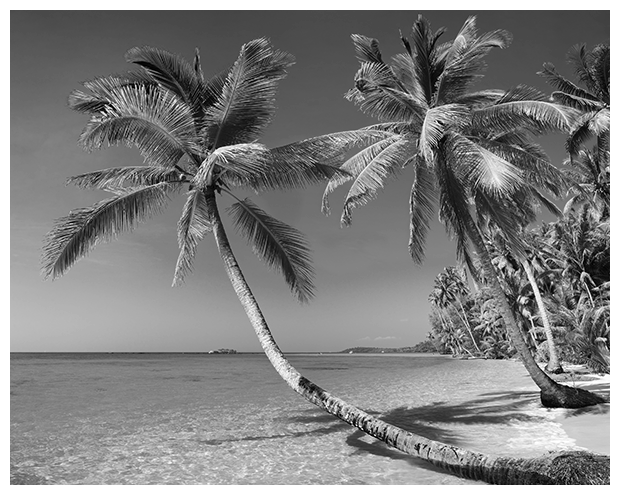

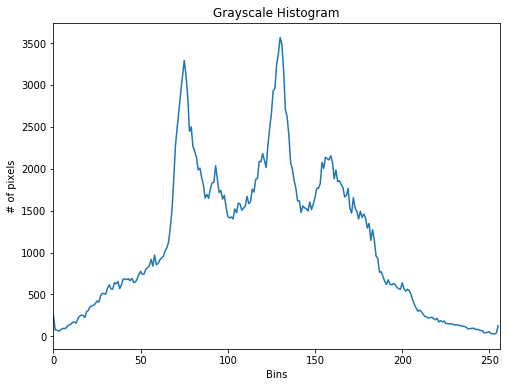

In [53]:
image = cv2.imread("images/beach.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# calculate histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

display(gray, flip=False, cmap="gray")
display(
    hist, flip=False, is_histogram=True, figsize=(8, 6),
    xlim=[0, 256], xlabel="Bins", ylabel="# of pixels",
    title="Grayscale Histogram"
)


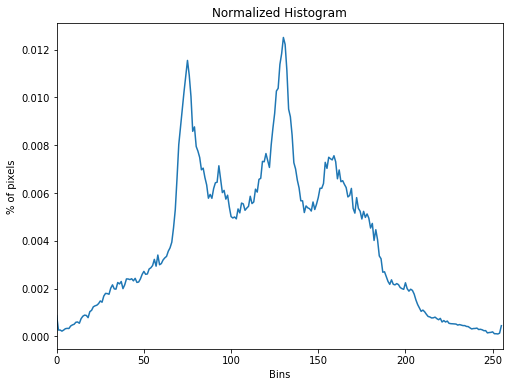

In [54]:
# normalized histogram
hist_normal = hist/hist.sum()
display(
    hist_normal, flip=False, is_histogram=True, figsize=(8, 6),
    xlim=[0, 256], xlabel="Bins", ylabel="% of pixels",
    title="Normalized Histogram"
)

#### Color Histograms

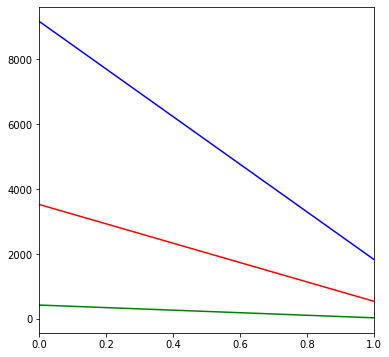

In [63]:
b, g, r = cv2.split(image)
hists = []
for c, name in [(b, "Blue"), (g, "Green"), (r, "Red")]:
    hists.append((cv2.calcHist([c], [0], None, [256], [0, 256]), name))
display_histogram(hists)

